# NO2 concentrations measured by NASA Aura research satellite, averaged during the time period of 1.2.2020 until 13.5.2021

![NASA Aura data](images/nasa.PNG "Giovanni site")

## Process the data from a .nc file to pandas dataframe

In [1]:
import netCDF4 as net
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
%matplotlib notebook

Read dataset from file

In [2]:
nc_file = 'C:\\Users\\laura.astola\\OneDrive - Accenture\\repos\\ATMOSPHERE\\g4.timeAvgMap.OMNO2d_003_ColumnAmountNO2CloudScreened.20200201-20210513.2E_50N_8E_53N.nc'
f = net.Dataset(nc_file,'r')

Extract the latitude and longitude data

In [3]:
lat = f.variables['lat'][:]
lon = f.variables['lon'][:]
lat = lat.data
lon = lon.data

Extract the NO2 concentration data 

In [4]:
no = f.variables['OMNO2d_003_ColumnAmountNO2CloudScreened'][:]
no = no.data

Restrict the lat-lon-rectangle to cover the Netherlands and normalize to a number between 0 and 1

In [5]:
lat_start = np.argmin(np.abs(lat-50))
lat_end = np.argmin(np.abs(lat-54))
lon_start = np.argmin(np.abs(lon-3))
lon_end = np.argmin(np.abs(lon-8))
nos = no[lat_start:lat_end,lon_start:lon_end]
nos=nos/nos.max()

up-sample the number of coordinates to get a denser grid

In [6]:
n = 50
lat_up = np.linspace(lat[lat_start],lat[lat_end] , n)
lon_up = np.linspace(lon[lon_start], lon[lon_end], n)

interpolate the NO2 values on the new grid to match the up-sampling

In [7]:
points = []
for i in lon[lon_start:lon_end]:
    for j in lat[lat_start:lat_end]:
        points.append([i,j])
points = np.array(points)

values = []
for j in range(nos.shape[1]):
    for i in range(nos.shape[0]):
        values.append(nos[i,j])
values = np.array(values)

x2d, y2d = np.meshgrid(lon_up, lat_up)
no_up = griddata(points, values, (x2d, y2d), method = "nearest",fill_value = nos.min())

Visualize the NO2 concentration level surface

<IPython.core.display.Javascript object>


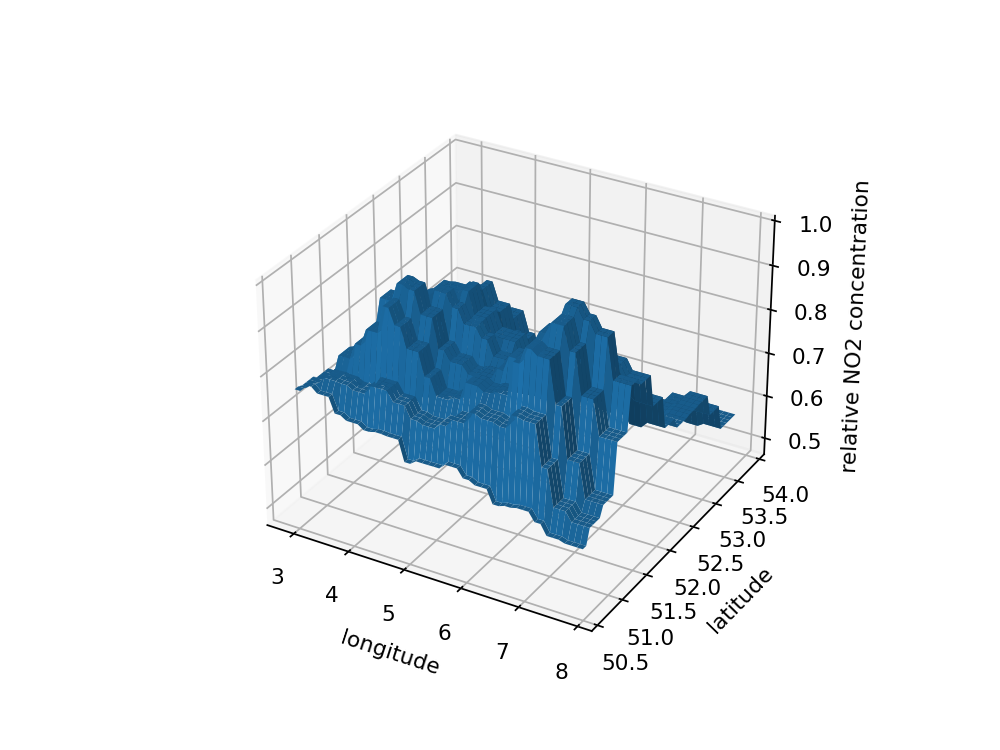

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x2d, y2d, no_up)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('relative NO2 concentration')
plt.show()

flatten the grid data and save to a dataframe

In [9]:
df = pd.DataFrame(columns = ['lat','lon','NO2'])

In [10]:
df['lat'] = np.ravel(y2d)
df['lon'] = np.ravel(x2d)
df['NO2'] = np.ravel(no_up)

In [11]:
# df.to_excel('coords_and_no2_2021.xlsx',index=False)